In [1]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os
from random import sample 

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, GRU, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import json
import os
import pickle

In [3]:
train_file = bz2.BZ2File('train.ft.txt.bz2')

In [5]:
def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]))
        texts.append(x[10:].strip())
    return np.array(labels), texts
#train_labels, train_texts = get_labels_and_texts('../input/train.ft.txt.bz2')

In [6]:
train_labels, train_texts = get_labels_and_texts('train.ft.txt.bz2')

In [7]:
set(train_labels)

{1, 2}

In [23]:
negative_text = [i for (i, v) in zip(train_texts, train_labels) if v==1]
positive_text = [i for (i, v) in zip(train_texts, train_labels) if v==2]

In [48]:
negative_text=sample(negative_text,20000)

In [24]:
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(negative_text)

In [70]:
sequences = tokenizer.texts_to_sequences(negative_text)

(array([ 705., 4275., 3655., 3391., 2596., 2172., 1595., 1038.,  494.,
          79.]),
 array([  3. ,  22.6,  42.2,  61.8,  81.4, 101. , 120.6, 140.2, 159.8,
        179.4, 199. ]),
 <BarContainer object of 10 artists>)

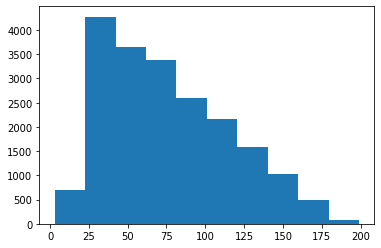

In [12]:
plt.hist(np.array([len(s) for s in sequences]))

In [71]:
model_text = [i for i in sequences if len(i)<=80]

In [72]:
len(model_text)

18064

In [73]:
sequence_len = int(np.median(np.array([len(s) for s in model_text])))
print(sequence_len)

48


In [79]:
padded_len = int(sequence_len*1.2)
print(padded_len)
sequences = pad_sequences(model_text, maxlen=padded_len, padding='pre')

57


In [75]:
sequences

array([[   0,    0,    0, ...,  270,   53,   72],
       [   0,    0,    0, ...,   18,   45, 1631],
       [   0,    0,    0, ..., 1628,   12,  307],
       ...,
       [   0,    0,    0, ...,   25,  793,  743],
       [ 111,  996,    8, ...,  120,  172,   11],
       [   0,    0,    0, ...,   11,    1,  697]])

In [76]:
X = []
y = []
for s in sequences:
    for j in range(len(s) - sequence_len):
        X.append(np.array(s[j:j+sequence_len]))
        y.append(s[j+sequence_len])

In [77]:
X = np.array(X)
y_cat = np.array(to_categorical(y))

In [78]:
X.shape,y_cat.shape

((433536, 48), (433536, 5000))

In [160]:
y_cat.shape[1]

5000

In [161]:
MODEL_DIR = os.path.join('..', 'app', 'demo', 'model')

In [162]:
MODEL_DIR

'..\\app\\demo\\model'

In [165]:
os.getcwd()

'C:\\Users\\matth\\PycharmProjects\\SMDL\\project\\train.ft.txt.bz2'

In [166]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0224-D400

 Directory of C:\Users\matth\PycharmProjects\SMDL\project\train.ft.txt.bz2

20/10/2020  04:41 pm    <DIR>          .
20/10/2020  04:41 pm    <DIR>          ..
19/10/2020  08:36 pm    <DIR>          .ipynb_checkpoints
20/10/2020  04:41 pm            14,078 project workings.ipynb
20/10/2020  04:34 pm             5,030 project_template_yourname.py
19/10/2020  08:31 pm       464,275,989 train.ft.txt.bz2
               3 File(s)    464,295,097 bytes
               3 Dir(s)  347,364,110,336 bytes free
